# SUMMER ANALYTICS 2025



# Week-1 Assignment

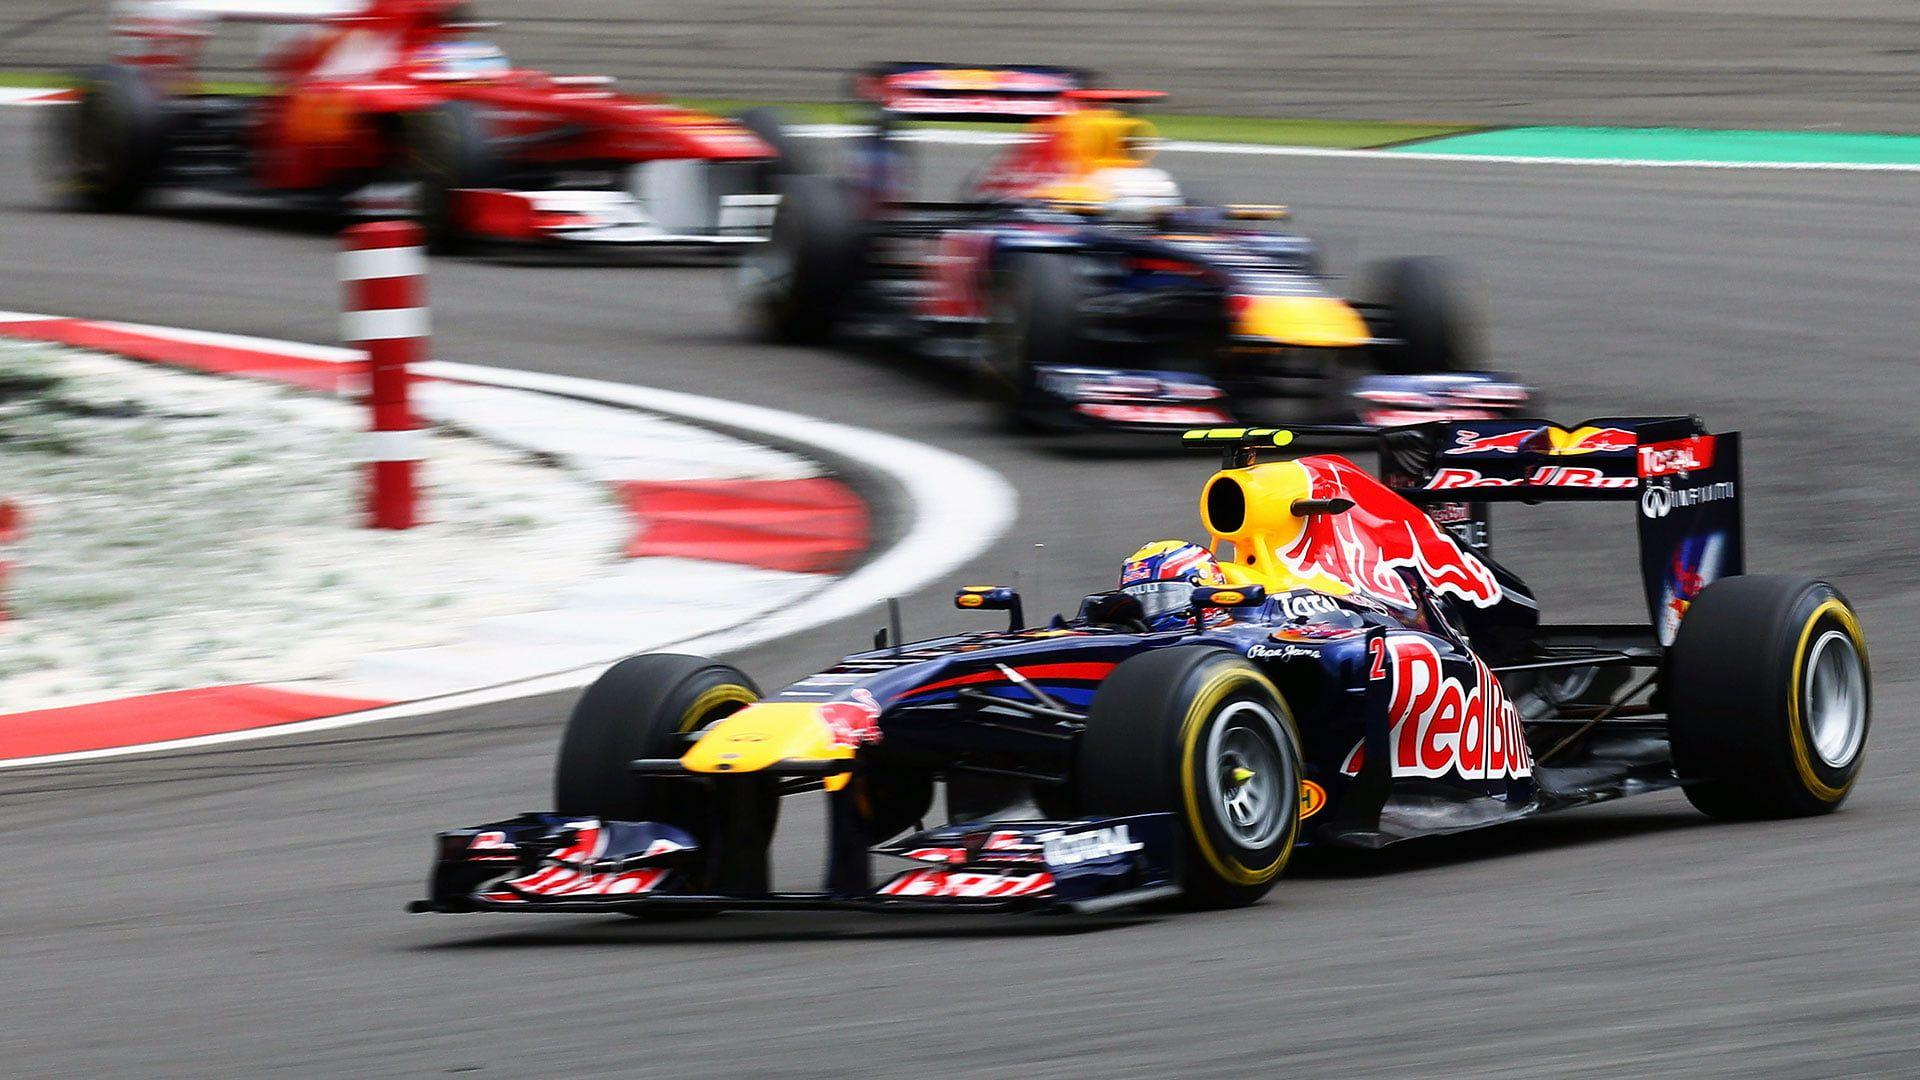

# **Data Grand Prix!**



**Welcome to your first assignment of Summer Analytics 2025! We hope you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about cars.**

**We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

image.avif

**So lets get started!! Buckle up your belts for this exciting ride!!**

### 1) Start by importing all important libraries
For eg, "import numpy as np"

In [2]:
import pandas as pd
import numpy as np

### 2) Read the csv file and assign it to a variable .

In [4]:
df = pd.read_csv("Cars.csv")


### 3) Display shape of dataframe
Expected Output - (398, 9)

In [6]:
df.shape

(398, 9)

### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [7]:
df.columns.tolist()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin',
 'name']

### 6) Set the 'name' column as the index of dataframe

In [8]:
df.set_index('name', inplace=True)

###  7) Print a list of all the unique mpg values





In [10]:
print(df['mpg'].unique())

[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]


### 8) Create a column which contains the horsepower divided by weightas its metric and make this new column the index.

In [13]:
df['hp_per_weight'] = df['horsepower'] / df['weight']
df.set_index('hp_per_weight', inplace=True)

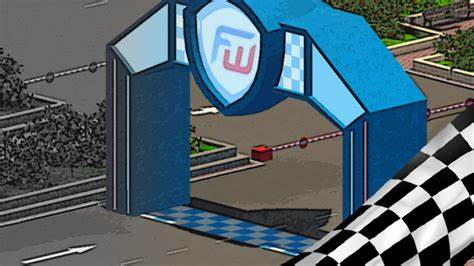

 **Checkpoint!!
Congratulations on making it this far. You are really keeping up in Data Grand Prix.
Now starts the real race i.e. graded questions of the quiz.**

## GRADED Questions (To be answered in the quiz)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. What is name of car that has the highest horsepower?  

In [15]:
df[df['horsepower'] == df['horsepower'].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
hp_per_weight,,,,,,,,
0.053763,16.0,8,400.0,230.0,4278,9.5,73,usa


### 2. How many cars have mpg ≥ 35?

In [16]:
high_mpg_count = df[df['mpg'] >= 35].shape[0]
print( high_mpg_count)

36


### 3. What is the most common origin for cars with horsepower > 100 and weight < 3000?

In [17]:
filtered_cars = df[(df['horsepower'] > 100) & (df['weight'] < 3000)]
common_origin = filtered_cars['origin'].mode()[0]
print(common_origin)

usa


### 4. What is the mean acceleration of cars from Japan? (rounded to 2 decimals)

In [18]:
mean_acc_japan = round(df[df['origin'] == 'japan']['acceleration'].mean(), 2)
print( mean_acc_japan)

16.17


### 5. Which year had the highest average mpg?

In [19]:
yearly_mpg = df.groupby('model_year')['mpg'].mean()
highest_mpg_year = yearly_mpg.idxmax()
print(highest_mpg_year)

80



## *Congratulations on coming this far! Since we were having so much fun playing with this dataset, let's move towards finish line by attempting some Ungraded questions!*

### **Note:** These questions are UNGRADED, and are given as an extra exercise.

### Find the car (or cars) with the best ratio of horsepower to weight among all cars that also have above-median mpg.

In [20]:
median_mpg = df['mpg'].median()
filtered = df[df['mpg'] > median_mpg].copy()
filtered['hp_weight_ratio'] = filtered['horsepower'] / filtered['weight']
filtered.loc[filtered['hp_weight_ratio'].idxmax()]

,0.050582
mpg,26.0
cylinders,4
displacement,121.0
horsepower,113.0
weight,2234
acceleration,12.5
model_year,70
origin,europe
hp_weight_ratio,0.050582


### Design a multi-line plot using Matplotlib or Seaborn that shows the evolution of average mpg over the years, separately for each origin

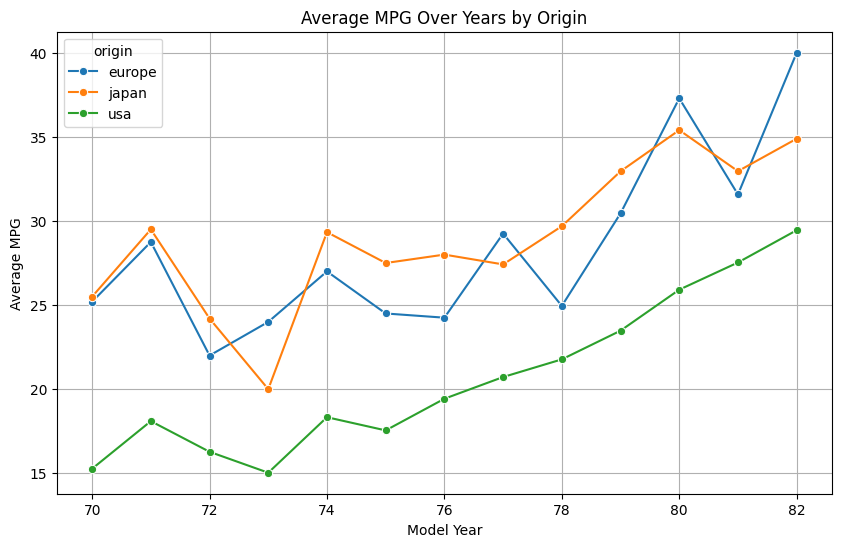

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_mpg = df.groupby(['model_year', 'origin'])['mpg'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_mpg, x='model_year', y='mpg', hue='origin', marker='o')
plt.title('Average MPG Over Years by Origin')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True)
plt.show()

### Create a Seaborn scatterplot (or PairGrid) where:

X = horsepower

Y = weight

Color by: origin

Size by: mpg

Hue order = ['japan', 'europe', 'usa']

Add meaningful plot titles and axis titles.

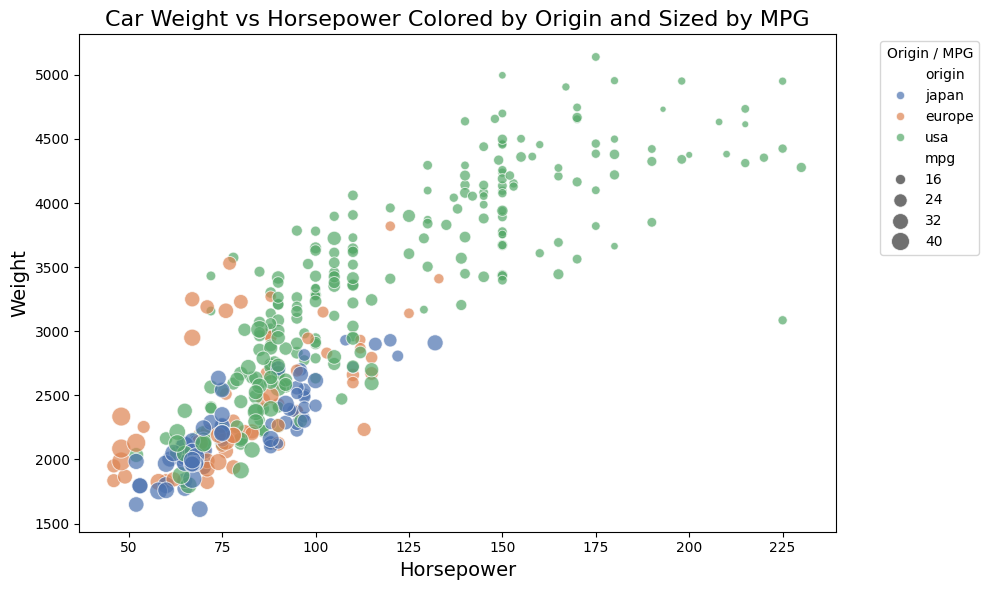

In [23]:
df = sns.load_dataset('mpg').dropna(subset=['horsepower', 'weight', 'origin', 'mpg'])

# Make sure origin is categorical with desired order
df['origin'] = pd.Categorical(df['origin'], categories=['japan', 'europe', 'usa'], ordered=True)

plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(
    data=df,
    x='horsepower',
    y='weight',
    hue='origin',
    size='mpg',
    sizes=(20, 200),
    hue_order=['japan', 'europe', 'usa'],
    palette='deep',
    alpha=0.7,
    edgecolor='w',
    linewidth=0.7
)

plt.title('Car Weight vs Horsepower Colored by Origin and Sized by MPG', fontsize=16)
plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Weight', fontsize=14)
plt.legend(title='Origin / MPG', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### We define a “consistent” car model as one that was produced over multiple years and had very low variation in mpg across those years (standard deviation < 1.0).

Tasks:

Identify car names that appear in more than one model_year.

For each such name, compute the standard deviation of mpg across years.

Return the car(s) with the lowest variation in mpg, among those with at least 2 appearances and std(mpg) < 1.0.

Report the model name(s), number of appearances, and the average mpg.

Bonus:
Sort the result by number of appearances (descending), then mpg (descending).

In [24]:
name_counts = df['name'].value_counts()
multi_year_cars = name_counts[name_counts > 1].index

# Filter dataframe
consistent_df = df[df['name'].isin(multi_year_cars)]

# Group by car name
grouped = consistent_df.groupby('name')['mpg'].agg(['count', 'mean', 'std'])

# Filter for std < 1.0 and at least 2 appearances
result = grouped[(grouped['count'] >= 2) & (grouped['std'] < 1.0)]

# Sort by count descending, then mpg
result_sorted = result.sort_values(by=['count', 'mean'], ascending=[False, False])

# Final result
result_sorted

,count,mean,std
name,,,
ford galaxie 500,3,14.333333,0.577350
plymouth fury iii,3,14.333333,0.577350
toyota corolla 1200,2,31.500000,0.707107
mazda 626,2,31.450000,0.212132
volkswagen rabbit,2,29.250000,0.353553
datsun pl510,2,27.000000,0.000000
saab 99le,2,24.500000,0.707107
toyota mark ii,2,19.500000,0.707107
dodge aspen,2,18.850000,0.353553


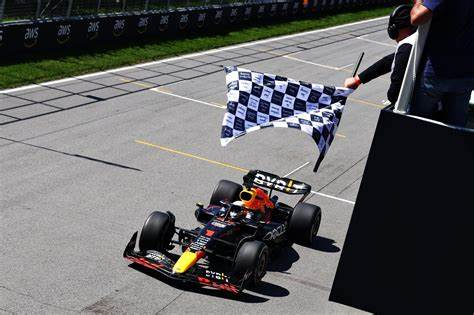

**Congratulations on completing the race. Kudos to you. Looking forward to meet you in next week.**